In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('IGEM_teams_2004-2024.csv')
data.head()

,Year,Team Name,Wiki,Region,Location,Institution,Section,Application,Project Title,Track,Abstract,Parts,Medal,Nominations,Awards
0,2004,BU,http://partsregistry.org/cgi/partsdb/pgroup.cg...,-,United States,Boston University,Undergrad,NaN,-,-,-,-,-,-,-
1,2004,Caltech,http://partsregistry.org/cgi/partsdb/pgroup.cg...,-,United States,California Institute of Technology,Undergrad,NaN,-,-,-,-,-,-,-
2,2004,MIT,http://partsregistry.org/cgi/partsdb/pgroup.cg...,-,United States,Massachusetts Institute of Technology,Undergrad,NaN,-,-,-,-,-,-,-
3,2004,Princeton,http://partsregistry.org/cgi/partsdb/pgroup.cg...,-,United States,Princeton University,Undergrad,NaN,-,-,-,-,-,-,-
4,2004,UTAustin,http://partsregistry.org/cgi/partsdb/pgroup.cg...,-,United States,University of Texas Austin,Undergrad,NaN,Bio-'film',-,UT Austin team chose to design and build a bio...,-,-,-,-


In [3]:
#2007-2020 has valid medal and prize data
data_2007_to_2020 = data[[year >= 2007 and year <= 2020 for year in data['Year']]]
data_2007_to_2020.head()

,Year,Team Name,Wiki,Region,Location,Institution,Section,Application,Project Title,Track,Abstract,Parts,Medal,Nominations,Awards
55,2007,Alberta,http://2007.igem.org/Alberta,-,Canada,University of Alberta,Undergrad,NaN,Butanerds,We propose using a different fuel source to ev...,-,-,Gold,-,Best Energy
56,2007,Bangalore,http://2007.igem.org/Bangalore,-,India,National Centre for Biological Sciences Bangalore,Undergrad,NaN,Bottom-up biology: A proof of principle,"As synthetic biologists, we aim to build biolo...",-,-,Gold,-,Best Modeling / Sim.
57,2007,Bay Area RSI,http://2007.igem.org/Bay_Area_RSI,-,United States,University of California Berkeley + Stanford U...,Undergrad,NaN,NaN,Our goal is to repair damaged hearts. We are e...,-,-,Silver,-,-
58,2007,Berkeley LBL,http://2007.igem.org/Berkeley_LBL,-,United States,University of California Berkeley,Undergrad,NaN,NaN,The purpose of the project is to engineer the ...,-,-,Bronze,-,Best Poster
59,2007,Berkeley UC,http://2007.igem.org/Berkeley_UC,-,United States,University of California Berkeley,Undergrad,NaN,Bacto Blood,"The necessity of inexpensive, disease-free, an...",-,-,Gold,-,Finalist


In [4]:
all_awards = [awards.split(', ') for awards in data_2007_to_2020['Awards'].dropna()]

all_awards = [
    award
    for awards in all_awards
    for award in awards]

[all_awards.remove('-') for item in all_awards if item == '-']
all_awards = pd.Series(all_awards)
unique_awards =  pd.Series(all_awards.unique())

In [5]:
unique_awards = unique_awards[[True if 'Best' in award else False for award in unique_awards]]

In [6]:
for unique_award in unique_awards:
    data_2007_to_2020[unique_award] = [1 if unique_award in str(awards) else 0 for awards in data_2007_to_2020['Awards']]

data_2007_to_2020['Win?'] = [1 if 'Grand' in str(awards) else 0 for awards in data_2007_to_2020['Awards']]

C:\Users\caden\AppData\Local\Temp\ipykernel_4812\3051449542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2007_to_2020[unique_award] = [1 if unique_award in str(awards) else 0 for awards in data_2007_to_2020['Awards']]
C:\Users\caden\AppData\Local\Temp\ipykernel_4812\3051449542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2007_to_2020[unique_award] = [1 if unique_award in str(awards) else 0 for awards in data_2007_to_2020['Awards']]
C:\Users\caden\AppData\Local\Temp\ipykernel_4812\305

In [16]:
def get_medal(medal: str):
    match medal:
        case 'Gold': return 3
        case 'Silver': return 2
        case 'Bronze': return 1
        case _ : return 0
data_2007_to_2020['Medal Score'] = [get_medal(medal) for medal in data_2007_to_2020['Medal']]

In [17]:
data_2007_to_2020 = data_2007_to_2020.reset_index(drop=True)

In [18]:
unique_awards = unique_awards._append(pd.Series('Medal Score'))

In [19]:
DATA = data_2007_to_2020

def add_counterfactuals(estimator, hyperparams = {}, data = DATA):
    #for each datapoint train on everything but that datapoint, then predict proba
    counterfactual_scores = []
    for year in data['Year'].unique():
        temp_data = data[data['Year'] != year]
        model = estimator(**hyperparams)
        model.fit(temp_data[unique_awards], temp_data['Win?'])
        for score in model.predict_proba(data[data['Year'] == year][unique_awards]): counterfactual_scores.append(score) 
    return counterfactual_scores

#counterfactuals = add_counterfactuals()

In [20]:
import matplotlib.pyplot as plt

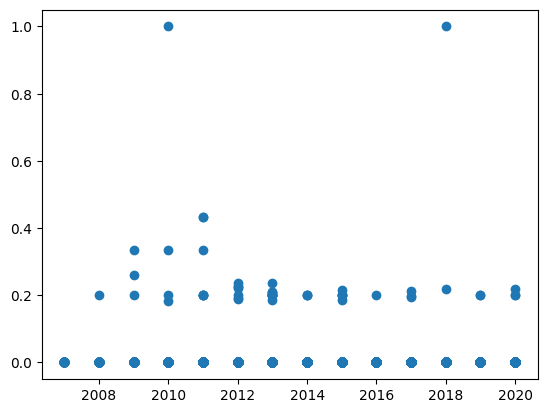

In [21]:
from sklearn.neighbors import KNeighborsClassifier
counterfactuals = add_counterfactuals(KNeighborsClassifier, {'weights':'distance'})
counterfactuals = pd.DataFrame(counterfactuals)[1]
plt.scatter(data_2007_to_2020['Year'], counterfactuals)

In [22]:
from sklearn.preprocessing import quantile_transform
normalized_conterfactuals = quantile_transform(pd.DataFrame(counterfactuals))
normalized_conterfactuals

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

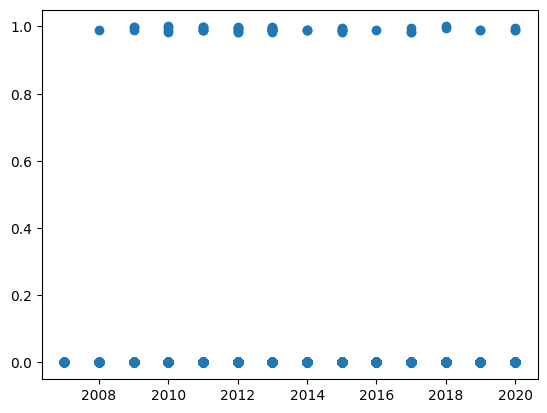

In [23]:
plt.scatter(data_2007_to_2020['Year'], normalized_conterfactuals)

In [24]:
import plotly.express as px

In [25]:
data_2007_to_2020['Counterfactual Score'] = counterfactuals

In [26]:
fig = px.scatter(data_2007_to_2020,
                 x='Year',
                 y='Counterfactual Score',
                 hover_name='Team Name')
fig.show()